# 1. importing Libraries and DataSet

In [138]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [139]:
# Seeding for reprducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds(42)

In [140]:
# Loading Datset
df= pd.read_csv("creditcard.csv")

# 2. Basic Checks

In [141]:
# Checking top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [142]:
# Checking bottom 5 columns
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [143]:
# Checking the No. of rows and Columns from data
df.shape

(284807, 31)

In [144]:
# Checking memory usages
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

In [145]:
# Checking data type count
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [146]:
# Checking the imbalance of target classes
no_of_classes= df['Class'].nunique()
print(no_of_classes)
df['Class'].value_counts()

2


Class
0    284315
1       492
Name: count, dtype: int64

## Report 1 (Basic Checks)

##### 1. The data set have 284807 rows and 31 columns, out of which the Target column is 'Class'.
##### 2. 30 Columns are float and one is int which is 'Class'
##### 3. The Classes are highly imbalanced with 284315 entries for class 0 (Non Frauds), and only 492 entries for class 1 (Frauds)


In [147]:
'*'*500

'********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************'

# 3. Data Split

In [148]:
# Droping the 'Time' and defining the Features and Target
df= df.drop('Time', axis= 1)
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [149]:
# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 42)
print(f"The Shape of  X_train is: {X_train.shape}")
print(f"The Shape of  X_test is: {X_test.shape}")
print(f"The Shape of  y_train is: {y_train.shape}")
print(f"The Shape of  y_test is: {y_test.shape}")


The Shape of  X_train is: (227845, 29)
The Shape of  X_test is: (56962, 29)
The Shape of  y_train is: (227845,)
The Shape of  y_test is: (56962,)


In [150]:
'*'*200

'********************************************************************************************************************************************************************************************************'

# 4. Exploratory Data Analysis (EDA)

In [151]:
# Descriptive Statistics
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


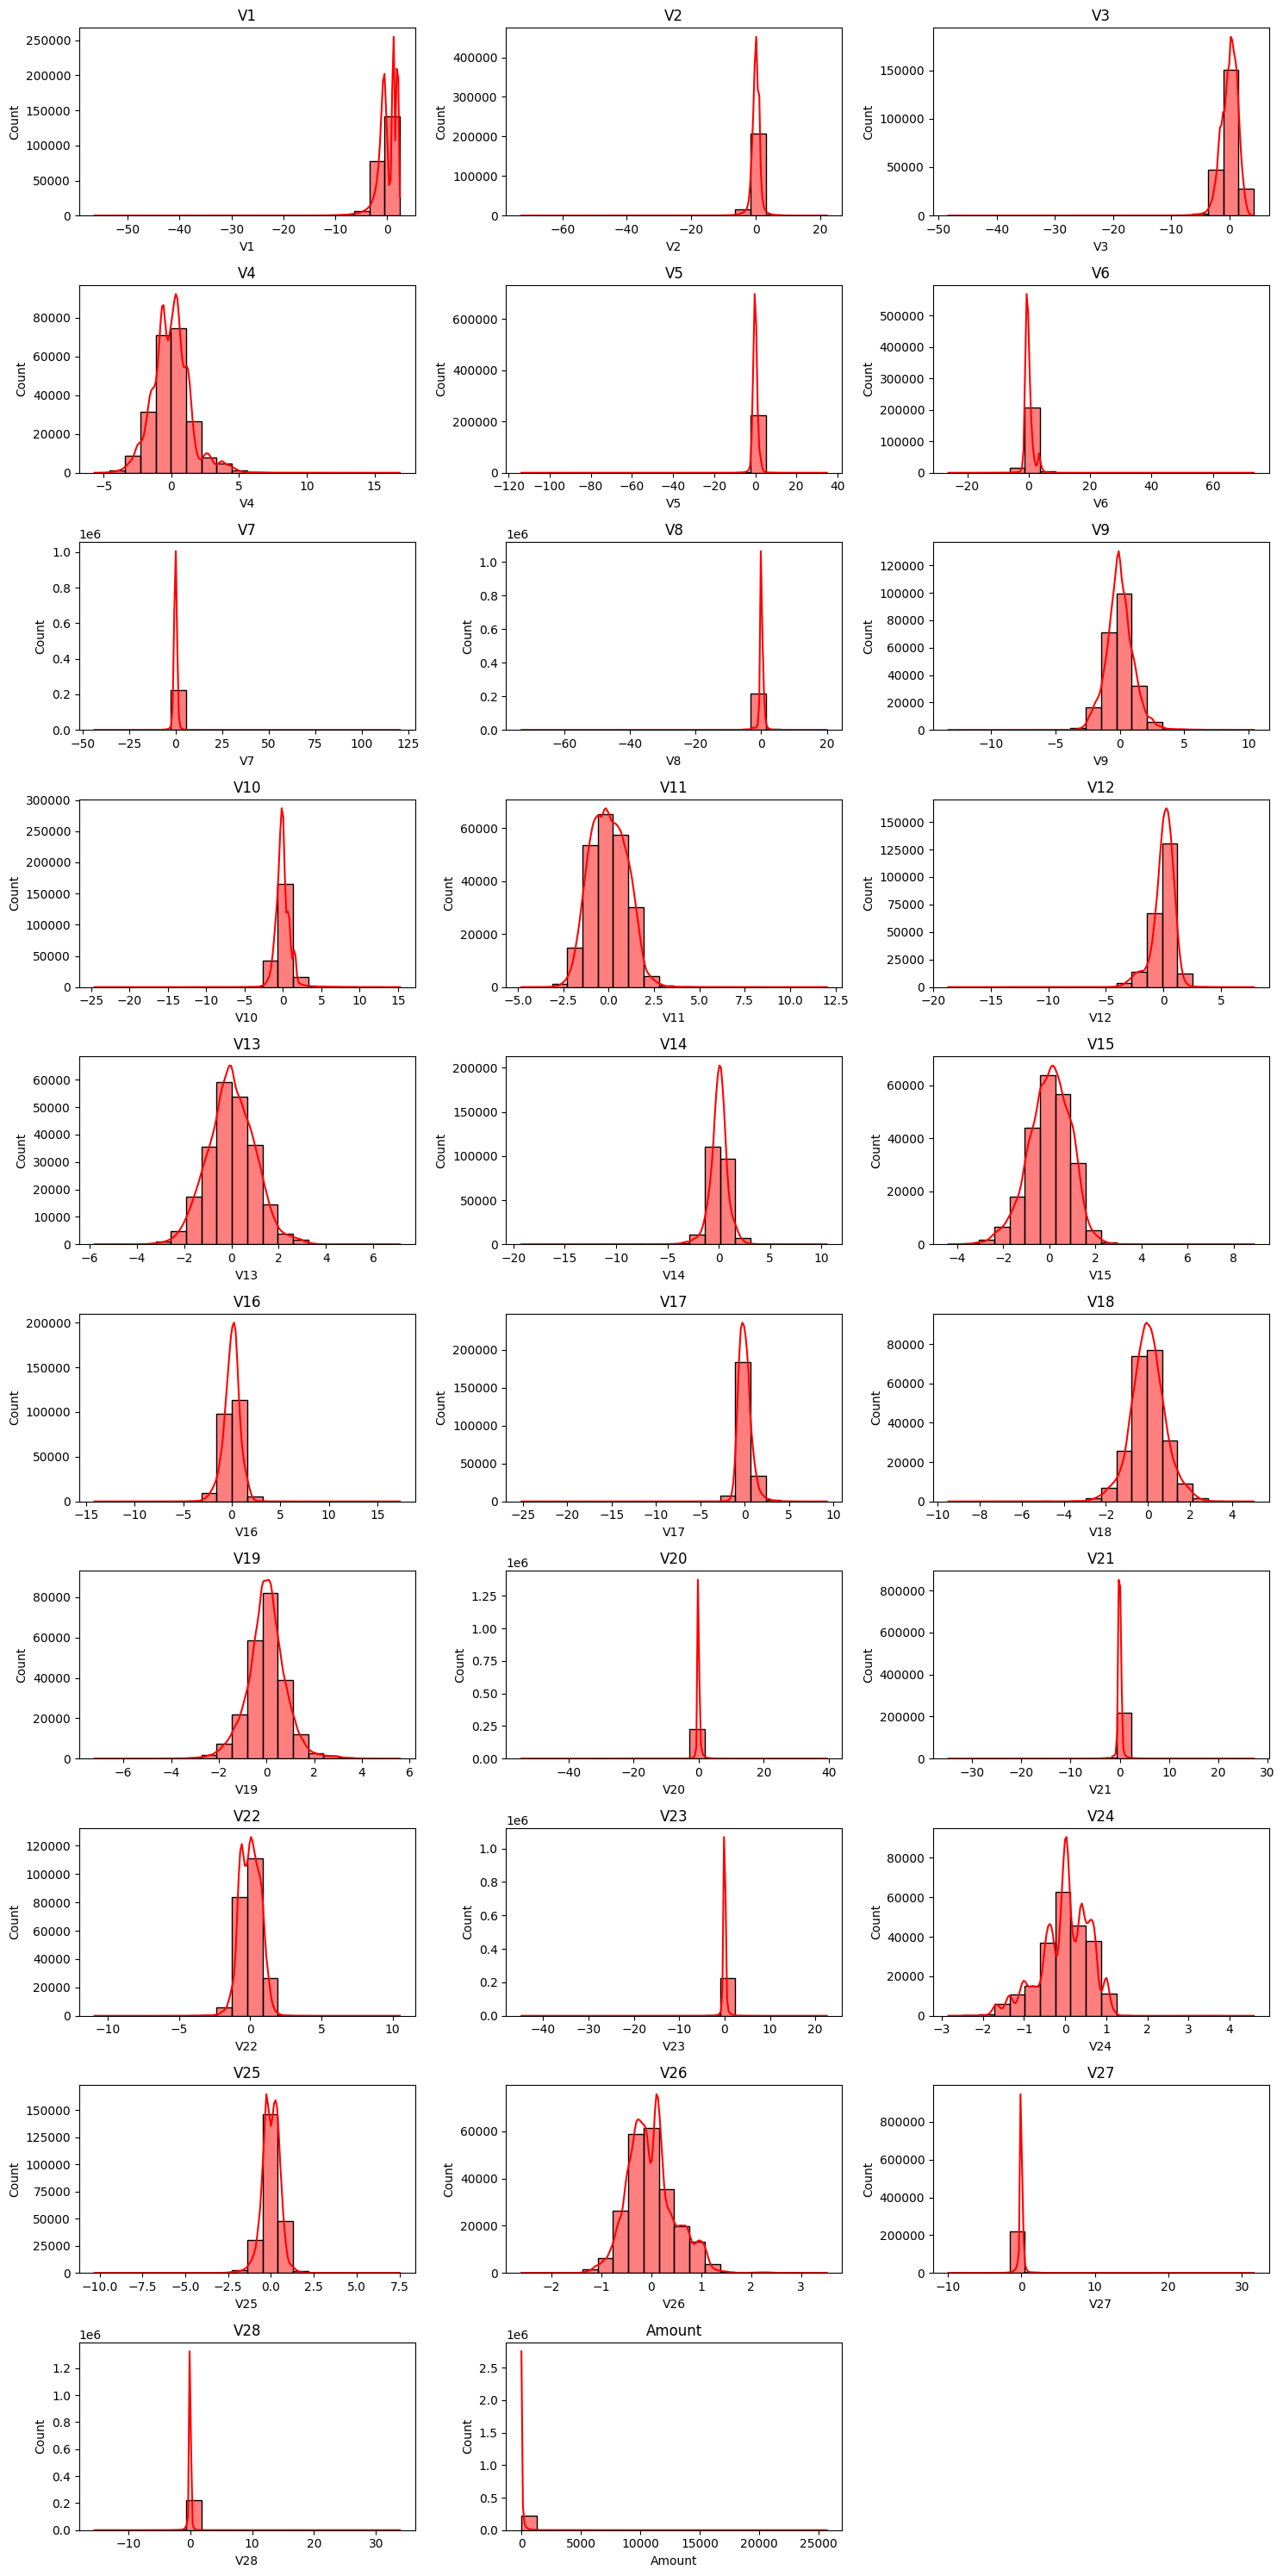

In [152]:

# Plot Histogram of each feature of X_train
plt.figure(figsize=(15,30))
for i, col in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.histplot(X_train[col], kde= True, bins= 20, color= 'red')
    plt.title(col)
plt.tight_layout()
plt.show()

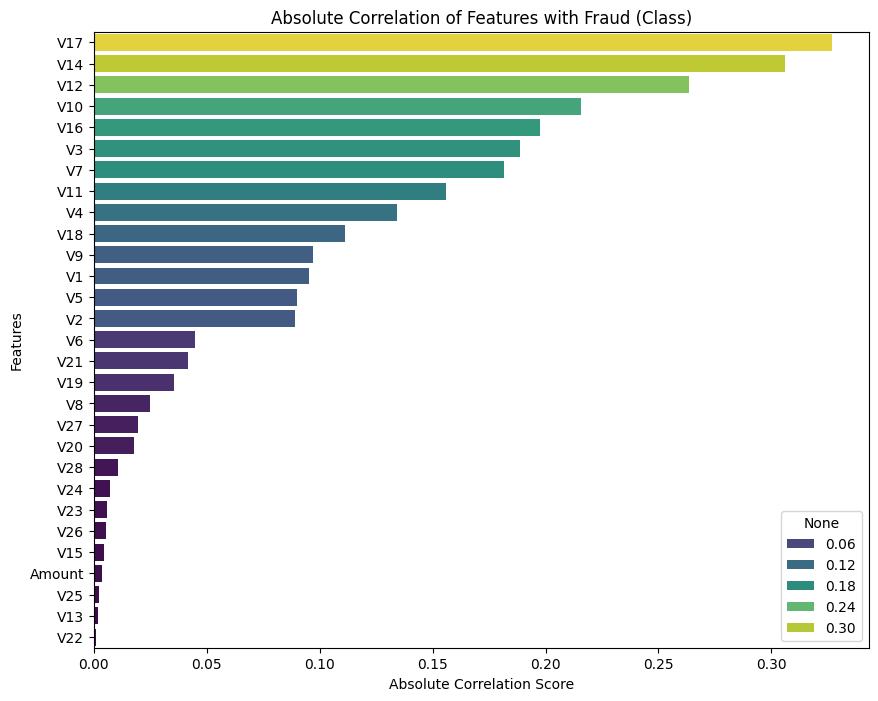

In [153]:
# 1. Calculate correlations
corr_with_target = X_train.corrwith(y_train).abs()
top_features = corr_with_target.sort_values(ascending=False)

# 2. Plotting the Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, hue= top_features, palette='viridis')

plt.title('Absolute Correlation of Features with Fraud (Class)')
plt.xlabel('Absolute Correlation Score')
plt.ylabel('Features')
plt.show()

## Report 2 (EDA)

##### 1.  The values are scaled so we can't able to understand the descriptive statistics properly
##### 2. The Distribution of almost all feature is close to the normal due to the fetures are alredy scaled. Except 'Amount'
##### 3. V17, V14, V12, V10, V16 are the to feature contributing in prediction of target variable

In [154]:
'*'*200

'********************************************************************************************************************************************************************************************************'

# 5. Feature Engineering

In [155]:
# We must scle the 'Amount' feature to match the scale of others
features_to_scale= ['Amount']
std= StandardScaler()
X_train[features_to_scale] = std.fit_transform(X_train[features_to_scale])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [156]:
# Transforming the test set
X_test[features_to_scale]= std.transform(X_test[features_to_scale])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


In [157]:
'*'*200

'********************************************************************************************************************************************************************************************************'

# 6. Model Building

### Model_1 Base

In [158]:
# Starting with the sufficient hidden layers and neurons (The Standard Way)
model_1= Sequential()
model_1.add(Dense(64, activation= 'relu', input_dim= 29))
model_1.add(Dense(32, activation= 'relu'))
model_1.add(Dense(16, activation= 'relu'))
model_1.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
# Compiling the model_1
model_1.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics=[tf.keras.metrics.Recall(),'accuracy'])

In [160]:
# Training the model_1
history_1= model_1.fit(X_train, y_train, epochs=10, validation_split= 0.2)

Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9991 - loss: 0.0075 - recall: 0.7249 - val_accuracy: 0.9991 - val_loss: 0.0034 - val_recall: 0.6588
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0033 - recall: 0.7832 - val_accuracy: 0.9994 - val_loss: 0.0030 - val_recall: 0.8118
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0029 - recall: 0.7832 - val_accuracy: 0.9994 - val_loss: 0.0029 - val_recall: 0.8235
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0027 - recall: 0.7961 - val_accuracy: 0.9995 - val_loss: 0.0028 - val_recall: 0.8235
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9995 - loss: 0.0025 - recall: 0.8091 - val_accuracy: 0.9994 - val_loss: 0.0030 - val_recall: 0.8118
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - recall: 0.8091 - val_accuracy: 0.9994 - val_loss: 0.0029 - val_r

In [161]:
# Storing the model_1 history in Variable
model_1_history= history_1.history

In [162]:
# Model_1 Summary
model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [163]:
# Calculating Model_1 probabilities
y_prob_1= model_1.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_1)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


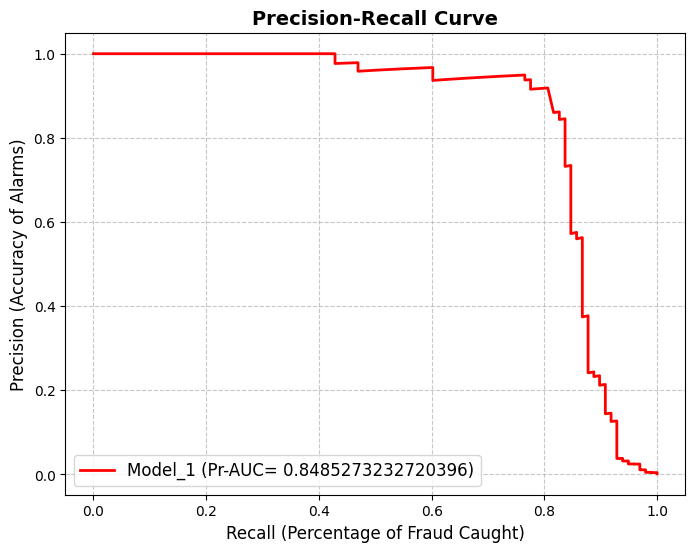

In [164]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"Model_1 (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [165]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.4587
Max F1-Score:      0.8587
Resulting Precision: 0.9186
Resulting Recall:    0.8061


In [166]:
# Making prediction
y_pred_1= np.where(y_prob_1>best_threshold,1,0 )

In [167]:
# Classification Report and Accuracy
acc_1= accuracy_score(y_test, y_pred_1)
cl_rep_1= classification_report(y_test, y_pred_1)
print(acc_1)
print(cl_rep_1)

0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Report 3 Base Model Report

#### 1. The model as per the 10 epochs performing good enough with 80% of Recall means capturing 80% of frauds and with a good precision of 92%.

In [168]:
'*'*200

'********************************************************************************************************************************************************************************************************'

### Running until using Early stopping to generlize

In [169]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='pr_auc')])

In [170]:
call_1= EarlyStopping(monitor= 'val_pr_auc',
                         min_delta= 0.001,
                         patience= 10,
                         verbose= 1,
                         mode= 'max',
                         baseline= None,
                         restore_best_weights= True,
                         start_from_epoch= 6)

In [171]:
# Training the model_1
history_1= model_1.fit(X_train, y_train, epochs=100, validation_split= 0.2, callbacks= call_1)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - pr_auc: 0.8855 - recall: 0.8091 - val_accuracy: 0.9996 - val_loss: 0.0034 - val_pr_auc: 0.8701 - val_recall: 0.8471
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - pr_auc: 0.8957 - recall: 0.8220 - val_accuracy: 0.9995 - val_loss: 0.0032 - val_pr_auc: 0.8604 - val_recall: 0.8353
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - pr_auc: 0.8924 - recall: 0.8220 - val_accuracy: 0.9994 - val_loss: 0.0038 - val_pr_auc: 0.8567 - val_recall: 0.8235
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9996 - loss: 0.0016 - pr_auc: 0.9097 - recall: 0.8188 - val_accuracy: 0.9995 - val_loss: 0.0038 - val_pr_auc: 0.8671 - val_recall: 0.8235
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9996 - loss: 0.0015 - pr_auc: 0.9165 - recall: 0.8317 - val_accuracy: 0.9994 - val_loss: 0.0043 - 

In [172]:
# Storing the model_1 history in Variable
model_1_history= history_1.history

In [173]:
# Model_1 Summary
model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [174]:
# Calculating Model_1 probabilities
y_prob_1= model_1.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_1)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


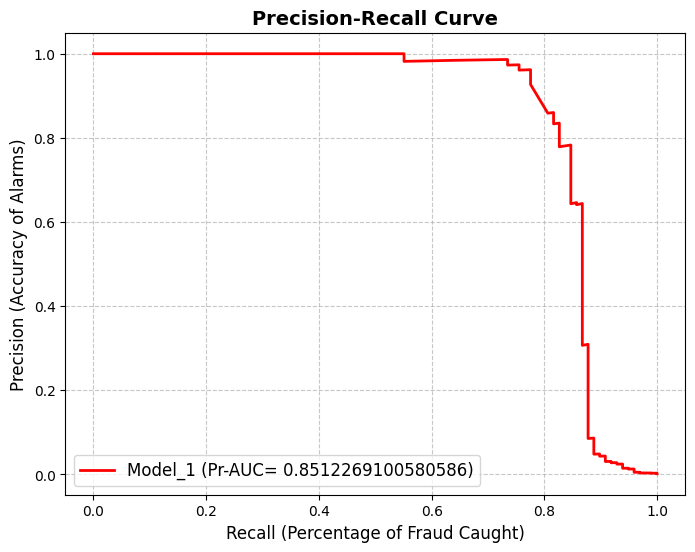

In [175]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"Model_1 (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [176]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.4750
Max F1-Score:      0.8588
Resulting Precision: 0.9620
Resulting Recall:    0.7755


In [177]:
# Making prediction
y_pred_1= np.where(y_prob_1>best_threshold,1,0 )
# Classification Report and Accuracy
acc_1= accuracy_score(y_test, y_pred_1)
cl_rep_1= classification_report(y_test, y_pred_1)
print(acc_1)
print(cl_rep_1)

0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Report 4 (Generlized Base model)
##### 1. The model is capturing 77% Frauds with a great precision
##### 2. Let's try to refine the model using the class weight techniques, beacuse the classes are highly imbalanced

In [178]:
'*'*200

'********************************************************************************************************************************************************************************************************'

## Model_3 (custom class weights model)

In [179]:
print(y_train.value_counts().sum())
print(y_train.value_counts())

227845
Class
0    227451
1       394
Name: count, dtype: int64


In [180]:
# defining class weights 
class_w1= {0:(227845/(2*227451)), 1:(227845/(394*2))}

In [181]:
# Defining the custom weight model
model_2= Sequential()
model_2.add(Dense(64, activation= 'relu', input_dim= 29))
model_2.add(Dense(32, activation= 'relu'))
model_2.add(Dense(16, activation= 'relu'))
model_2.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='pr_auc')])

In [183]:
call_2= EarlyStopping(monitor= 'val_pr_auc',
                         min_delta= 0.001,
                         patience= 10,
                         verbose= 1,
                         mode= 'max',
                         baseline= None,
                         restore_best_weights= True,
                         start_from_epoch= 0)

In [184]:
# Training the model_2
history_2= model_2.fit(X_train, y_train, epochs=100, class_weight= class_w1, validation_split= 0.2, callbacks= call_2)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9732 - loss: 0.2222 - pr_auc: 0.6054 - recall: 0.8770 - val_accuracy: 0.9917 - val_loss: 0.0866 - val_pr_auc: 0.7462 - val_recall: 0.9294
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9755 - loss: 0.1480 - pr_auc: 0.6164 - recall: 0.9126 - val_accuracy: 0.9826 - val_loss: 0.0800 - val_pr_auc: 0.7475 - val_recall: 0.9294
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9780 - loss: 0.1210 - pr_auc: 0.6518 - recall: 0.9353 - val_accuracy: 0.9824 - val_loss: 0.0630 - val_pr_auc: 0.7250 - val_recall: 0.9294
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9701 - loss: 0.1190 - pr_auc: 0.6162 - recall: 0.9353 - val_accuracy: 0.9797 - val_loss: 0.0673 - val_pr_auc: 0.7441 - val_recall: 0.9412
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9751 - loss: 0.0872 - pr_auc: 0.6740 - recall: 0.9417 - val_accuracy: 0.9836 - val_loss: 0.0507 - 

In [185]:
# Storing the model_2 history in Variable
model_2_history= history_2.history

In [186]:
# Model_2 Summary
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [187]:
# Calculating Model_2 probabilities
y_prob_2= model_2.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_2)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


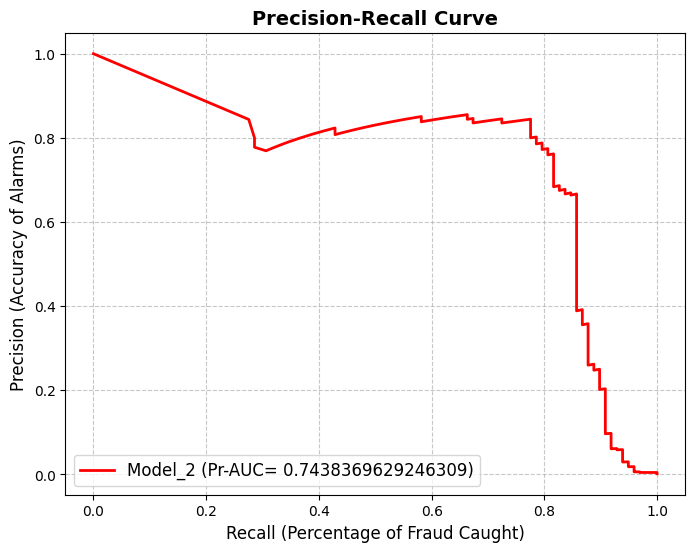

In [188]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"Model_2 (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [189]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.9969
Max F1-Score:      0.8085
Resulting Precision: 0.8444
Resulting Recall:    0.7755


In [190]:
# Making prediction
y_pred_2= np.where(y_prob_2>best_threshold,1,0 )
# Classification Report and Accuracy
acc_2= accuracy_score(y_test, y_pred_2)
cl_rep_2= classification_report(y_test, y_pred_2)
print(acc_2)
print(cl_rep_2)

0.9993504441557529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.77      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Report 5 (Custom Weight model Report)
##### 1. The model  catches the frauds, 77% with 84% precision
##### 2. This is not acceptable our goal is to catch frauds
##### 3. This model is also facing small overfitting issue.

In [191]:
'*'*200

'********************************************************************************************************************************************************************************************************'

### Model_3 (Refining custom weights)

In [192]:
# defining class weights we wiil start from 10 and check for 20, 30, 40, 50 (beccause 227451/(394*10) ~ 57)
class_w2= {0:1, 1:10}

In [193]:
# Defining the custom weight model
model_3= Sequential()
model_3.add(Dense(64, activation= 'relu', input_dim= 29))
model_3.add(Dense(32, activation= 'relu'))
model_3.add(Dense(16, activation= 'relu'))
model_3.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [194]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='pr_auc')])

In [195]:
call_3= EarlyStopping(monitor= 'val_pr_auc',
                         min_delta= 0.001,
                         patience= 10,
                         verbose= 1,
                         mode= 'max',
                         baseline= None,
                         restore_best_weights= True,
                         start_from_epoch= 0)

In [196]:
# Training the model_3
history_3= model_3.fit(X_train, y_train, epochs=100, class_weight= class_w2, validation_split= 0.2, callbacks= call_3)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9991 - loss: 0.0320 - pr_auc: 0.6664 - recall: 0.7605 - val_accuracy: 0.9994 - val_loss: 0.0050 - val_pr_auc: 0.7131 - val_recall: 0.8353
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9991 - loss: 0.0189 - pr_auc: 0.7365 - recall: 0.8155 - val_accuracy: 0.9994 - val_loss: 0.0044 - val_pr_auc: 0.7696 - val_recall: 0.8353
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9991 - loss: 0.0163 - pr_auc: 0.7659 - recall: 0.8123 - val_accuracy: 0.9994 - val_loss: 0.0044 - val_pr_auc: 0.7722 - val_recall: 0.8353
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9992 - loss: 0.0158 - pr_auc: 0.7677 - recall: 0.8317 - val_accuracy: 0.9993 - val_loss: 0.0042 - val_pr_auc: 0.8146 - val_recall: 0.8471
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9993 - loss: 0.0136 - pr_auc: 0.8036 - recall: 0.8447 - val_accuracy: 0.9994 - val_loss: 0.0038 - 

In [197]:
# Storing the model_3 history in Variable
model_3_history= history_3.history

In [198]:
# Model_3 Summary
model_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [199]:
# Calculating Model_3 probabilities
y_prob_3= model_3.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_3)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


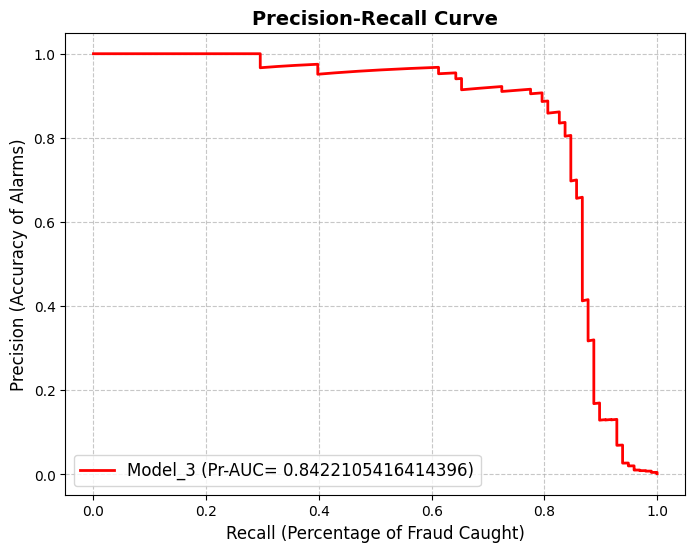

In [200]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"Model_3 (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [201]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.8171
Max F1-Score:      0.8478
Resulting Precision: 0.9070
Resulting Recall:    0.7959


In [240]:
# Making prediction
y_pred_3= np.where(y_prob_3>0.4,1,0 )
# Classification Report and Accuracy
acc_3= accuracy_score(y_test, y_pred_3)
cl_rep_3= classification_report(y_test, y_pred_3)
print(acc_3)
print(cl_rep_3)

0.9990344440153085
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



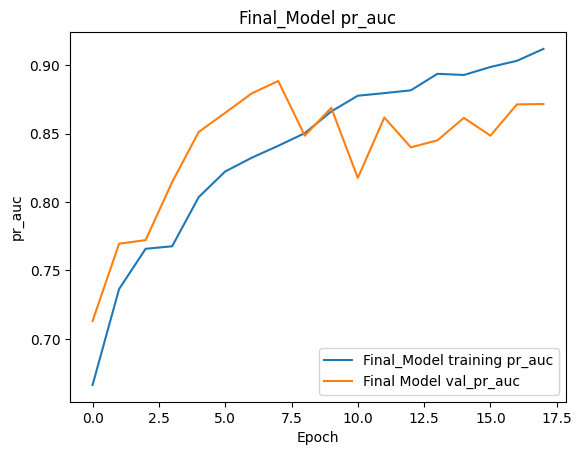

In [239]:
plt.plot(model_3_history['pr_auc'], label= 'Final_Model training pr_auc')
plt.plot(model_3_history['val_pr_auc'], label= 'Final Model val_pr_auc')
plt.title('Final_Model pr_auc')
plt.xlabel('Epoch')
plt.ylabel('pr_auc')
plt.legend(loc= 'best')
plt.show()

## Report 6 (Model_3)

##### 1. Model_3 is able to detect 86% of frauds by acheving 67% of precision which is not really good but we can adjust the threshold but before adjusting lets check the performence of all models.
##### 2. So instead of trying for another class weights we should focus on the refining this model by aadding some regularizations to make the model generlize on any unseen data.
##### 3. We will adjust the threshold to capture maximum frauds by maintaing the recall as high as possible.
##### 5. This model is not stable and have overfitting isssue.

In [203]:
'*'*200

'********************************************************************************************************************************************************************************************************'

###  Model_4


In [204]:
# Defining the Final  model
model_4= Sequential()
model_4.add(Dense(64, activation= 'relu', input_dim= 29))
model_4.add(Dense(32, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.001) ))
model_4.add(Dropout(0.2))
model_4.add(Dense(16, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.001)))
model_4.add(Dropout(0.4))
model_4.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
opt= Adam(learning_rate= 0.0001)

In [206]:
model_4.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='pr_auc')])

In [207]:
call_4= EarlyStopping(monitor= 'val_pr_auc',
                         min_delta= 0.001,
                         patience= 10,
                         verbose= 1,
                         mode= 'max',
                         baseline= None,
                         restore_best_weights= True,
                         start_from_epoch= 0)

In [208]:
# Training the Final Model with same class weights
history_4= model_4.fit(X_train, y_train, epochs=100, class_weight= class_w2, batch_size= 32, validation_split= 0.2, callbacks= call_4)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9851 - loss: 0.1657 - pr_auc: 0.3146 - recall: 0.4757 - val_accuracy: 0.9993 - val_loss: 0.0525 - val_pr_auc: 0.6990 - val_recall: 0.7765
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9988 - loss: 0.0822 - pr_auc: 0.6358 - recall: 0.7249 - val_accuracy: 0.9993 - val_loss: 0.0422 - val_pr_auc: 0.7392 - val_recall: 0.8471
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9992 - loss: 0.0643 - pr_auc: 0.6850 - recall: 0.8026 - val_accuracy: 0.9993 - val_loss: 0.0327 - val_pr_auc: 0.7468 - val_recall: 0.8471
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9992 - loss: 0.0521 - pr_auc: 0.7005 - recall: 0.7896 - val_accuracy: 0.9993 - val_loss: 0.0267 - val_pr_auc: 0.7403 - val_recall: 0.8471
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9992 - loss: 0.0457 - pr_auc: 0.7173 - recall: 0.8123 - val_accuracy: 0.9993 - val_loss: 0.0226 - 

In [209]:
# Storing the final model history in Variable
model_4_history= history_4.history

In [210]:
# Final model Summary
model_4.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [211]:
# Calculating Final model probabilities
y_prob_4= model_4.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_4)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


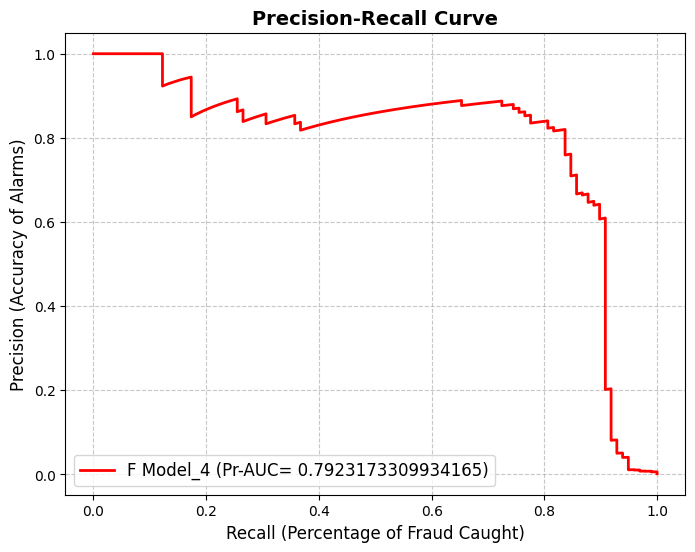

In [212]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"F Model_4 (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [213]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.6977
Max F1-Score:      0.8283
Resulting Precision: 0.8200
Resulting Recall:    0.8367


In [214]:
# Making prediction
y_pred_4= np.where(y_prob_4>best_threshold,1,0 )
# Classification Report and Accuracy
acc_4= accuracy_score(y_test, y_pred_4)
cl_rep_4= classification_report(y_test, y_pred_4)
print(acc_4)
print(cl_rep_4)

0.999385555282469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



### Adjusting the Threshold of final model (Because it is the best on default threshold) to capture maximum frauds.

In [215]:
# Making prediction
y_pred_4= np.where(y_prob_4>0.4,1,0 )
# Classification Report and Accuracy
acc_4= accuracy_score(y_test, y_pred_4)
cl_rep_4= classification_report(y_test, y_pred_4)
print(acc_4)
print(cl_rep_4)

0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



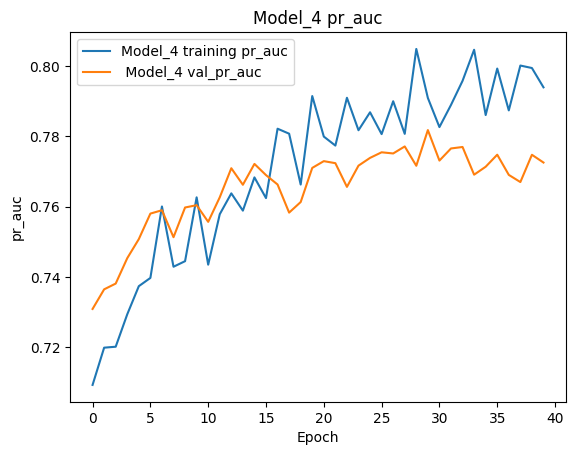

In [216]:
plt.plot(model_f_history['pr_auc'], label= 'Model_4 training pr_auc')
plt.plot(model_f_history['val_pr_auc'], label= ' Model_4 val_pr_auc')
plt.title('Model_4 pr_auc')
plt.xlabel('Epoch')
plt.ylabel('pr_auc')
plt.legend(loc= 'best')
plt.show()

## Report 7 The Model_4 report

##### 1. We are able to catch 85% of Frauds from 98 observations which is a great achievment, by maintaining a good precision 72%.
##### 2. But the model has a Overfitting issue, So this model may be not able to generlize on new unseen data, rather than test data.

In [217]:
'*'*200

'********************************************************************************************************************************************************************************************************'

### THe Final Model

In [300]:
w= {0:1, 1:10}

In [301]:
# Defining the Final  model
model_f1= Sequential()
model_f1.add(Dense(64, activation= 'relu', input_dim= 29))
model_f1.add(Dense(32, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.001) ))
model_f1.add(Dropout(0.2))
model_f1.add(Dense(8, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.001)))
model_f1.add(Dropout(0.5))
model_f1.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [302]:
opt= Adam(learning_rate= 0.0001)

In [303]:
model_f1.compile(optimizer= opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='pr_auc')])

In [304]:
call_f= EarlyStopping(monitor= 'val_pr_auc',
                         min_delta= 0.001,
                         patience= 10,
                         verbose= 1,
                         mode= 'max',
                         baseline= None,
                         restore_best_weights= True,
                         start_from_epoch= 0)

In [305]:
# Training the Final Model with same class weights
history_f= model_f1.fit(X_train, y_train, epochs=200, class_weight= w, batch_size= 64, validation_split= 0.2, callbacks= call_f)

Epoch 1/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.3078 - pr_auc: 0.0075 - recall: 0.2071 - val_loss: 0.0597 - val_pr_auc: 0.6301 - val_recall: 0.5294
Epoch 2/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1596 - pr_auc: 0.2509 - recall: 0.3172 - val_loss: 0.0448 - val_pr_auc: 0.7168 - val_recall: 0.7882
Epoch 3/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1308 - pr_auc: 0.3796 - recall: 0.3981 - val_loss: 0.0370 - val_pr_auc: 0.7426 - val_recall: 0.8353
Epoch 4/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1083 - pr_auc: 0.5847 - recall: 0.6408 - val_loss: 0.0318 - val_pr_auc: 0.7232 - val_recall: 0.8353
Epoch 5/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0924 - pr_auc: 0.6295 - recall: 0.6861 - val_loss: 0.0275 - val_pr_auc: 0.7194 - val_recall: 0.8353
Epoch 6/200
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0813 - pr_auc: 0.6656 - recall: 0.7184 - val_loss: 0.0244 - val_pr_auc: 0.7255 - val_recall: 0.8353
Epoch 7/2

In [318]:
# Calculating Final model probabilities
y_prob_f1= model_f1.predict(X_test)

# Calculate the precision recall and threshold
precision, recall, thresholds= precision_recall_curve(y_test, y_prob_f1)

# Calculate the area under the curve for legend
pr_auc= auc(recall, precision)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


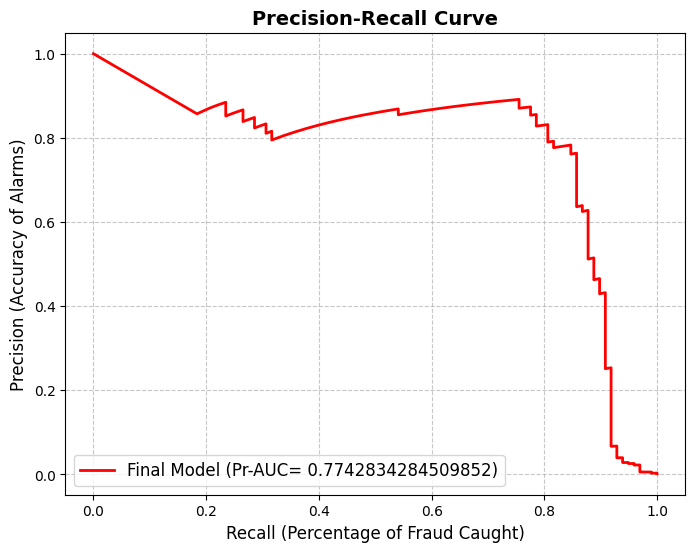

In [319]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color= 'red', linewidth= 2, label= f"Final Model (Pr-AUC= {pr_auc})")
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.xlabel('Recall (Percentage of Fraud Caught)', fontsize=12)
plt.ylabel('Precision (Accuracy of Alarms)', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [320]:
# 1. Calculate the F1-Score for every single point on your curve
# (Adding 1e-10 prevents a divide-by-zero error if precision and recall are both 0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# 2. Find the index (the exact row number) of the highest F1-Score
best_index = np.argmax(f1_scores)

# 3. Extract the winning threshold and its exact metrics
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(" --- THE MATHEMATICAL OPTIMUM --- ")
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max F1-Score:      {best_f1:.4f}")
print(f"Resulting Precision: {best_precision:.4f}")
print(f"Resulting Recall:    {best_recall:.4f}")

 --- THE MATHEMATICAL OPTIMUM --- 
Optimal Threshold: 0.9187
Max F1-Score:      0.8216
Resulting Precision: 0.8736
Resulting Recall:    0.7755


In [321]:
# Making prediction
y_pred_f1= np.where(y_prob_f1>0.35,1,0 )
# Classification Report and Accuracy
acc_f1= accuracy_score(y_test, y_pred_f1)
cl_rep_f1= classification_report(y_test, y_pred_f1)
print(acc_f1)
print(cl_rep_f1)

0.9993328885923949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [323]:
# Storing the final model history in Variable
model_f1_history= history_f.history

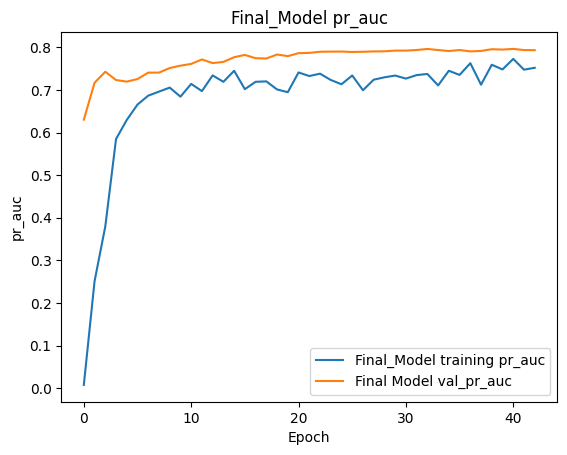

In [324]:
plt.plot(model_f1_history['pr_auc'], label= 'Final_Model training pr_auc')
plt.plot(model_f1_history['val_pr_auc'], label= 'Final Model val_pr_auc')
plt.title('Final_Model pr_auc')
plt.xlabel('Epoch')
plt.ylabel('pr_auc')
plt.legend(loc= 'best')
plt.show()

## Report 8 The Success..! Final Model report

##### 1. Build a model that captures 85% of Frauds with a precision of 78% which is a great trade-off.
##### 2. The model is stable and there is no overfitting which is a best thing.
##### 3. Build a great model without using SMOTE.

In [317]:
'*'*200

'********************************************************************************************************************************************************************************************************'

# 7. Saving the Scaler and Model

In [325]:
import joblib

# --- 1. Save the Keras Model ---
model_f1.save('fraud_model.keras') 
print("Model saved successfully.")

# --- 2. Save the StandardScaler ---
# We use joblib because it's efficient for numpy-heavy objects
joblib.dump(std, 'amount_scaler.pkl')
print("Scaler saved successfully.")

Model saved successfully.
Scaler saved successfully.
